Fatemeh Amanian

Train neural network models (at least two different networks for each dataset, i.e., no. layers, no. neurons, activations, ...) in either Tensorflow or Pytorch to perform regression on the following datasets:

One different dataset, up to your choice: Red Wine Quality

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
import numpy as np
import pandas as pd
import sklearn
import math
import glob
import os
import sys
print("imported!")

imported!


In [2]:
path = "data"

Importing:

In [3]:
wine1 = pd.read_excel(path+'/wine1.xls')
wine2 = pd.read_excel(path+'/win2.xls')

Let's view some of the data:

In [4]:
wine1.shape

(246, 12)

In [5]:
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 12 columns):
fixed acidity           246 non-null float64
volatile acidity        246 non-null float64
citric acid             246 non-null float64
residual sugar          246 non-null float64
chlorides               246 non-null float64
free sulfur dioxide     246 non-null float64
total sulfur dioxide    246 non-null float64
density                 246 non-null float64
pH                      246 non-null float64
sulphates               246 non-null float64
alcohol                 246 non-null float64
quality                 246 non-null int64
dtypes: float64(11), int64(1)
memory usage: 23.2 KB


In [7]:
wine2.shape

(130, 12)

In [8]:
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.23,0.39,14.2,0.058,49.0,192,0.9979,2.98,0.48,9.0,7
1,7.2,0.23,0.39,14.2,0.058,49.0,192,0.9979,2.98,0.48,9.0,7
2,7.2,0.23,0.39,14.2,0.058,49.0,192,0.9979,2.98,0.48,9.0,7
3,5.9,0.15,0.31,5.8,0.041,53.0,155,0.9945,3.52,0.46,10.5,6
4,7.4,0.28,0.42,19.8,0.066,53.0,195,1.0000,2.96,0.44,9.1,5


In [9]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
fixed acidity           130 non-null float64
volatile acidity        130 non-null float64
citric acid             130 non-null float64
residual sugar          130 non-null float64
chlorides               130 non-null float64
free sulfur dioxide     130 non-null float64
total sulfur dioxide    130 non-null int64
density                 130 non-null float64
pH                      130 non-null float64
sulphates               130 non-null float64
alcohol                 130 non-null float64
quality                 130 non-null int64
dtypes: float64(10), int64(2)
memory usage: 12.3 KB


The data seems to be compatible. Let's merge them:

In [10]:
wine=wine1.merge(wine2, how='outer')

c:\program files\python37\lib\site-packages\pandas\core\reshape\merge.py:1089: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [11]:
wine.shape

(376, 12)

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


We have to prepare the data before doing any statistical analysis on it:

First let's search for the missing values.
If the missing values are low, we can ignore them and remove them from the dataset.
Else, if they are high, we can entirely ignore the column having so many NaNs.

In [13]:
print(wine.isnull().sum())
# wine = wine.dropna(axis=0)
# print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Not much, we can just remove them.

Now we'll check for other anomalies in the data:

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 12 columns):
fixed acidity           376 non-null float64
volatile acidity        376 non-null float64
citric acid             376 non-null float64
residual sugar          376 non-null float64
chlorides               376 non-null float64
free sulfur dioxide     376 non-null float64
total sulfur dioxide    376 non-null float64
density                 376 non-null float64
pH                      376 non-null float64
sulphates               376 non-null float64
alcohol                 376 non-null float64
quality                 376 non-null int64
dtypes: float64(11), int64(1)
memory usage: 38.2 KB


Hmmm, it seems we have no non-numerical columns here.

Let's search for outliers: (Warning! Long output.)

In [15]:
for col in wine.columns:
    print(wine[col].value_counts())

6.8     36
7.2     31
7.1     26
6.4     21
7.3     20
6.3     18
6.7     18
7.4     18
6.9     17
7.0     16
6.2     15
6.1     14
6.6     14
6.0     13
6.5     11
7.5     10
5.8      8
5.9      7
8.1      6
8.3      6
8.2      5
7.9      5
7.6      4
5.7      4
5.6      4
5.1      3
8.6      3
7.8      3
7.7      3
5.0      2
5.5      2
5.2      2
8.5      2
9.8      2
5.4      2
10.2     1
8.4      1
10.0     1
8.0      1
9.1      1
Name: fixed acidity, dtype: int64
0.240    29
0.230    26
0.270    26
0.280    25
0.250    20
         ..
0.590     1
0.255     1
0.905     1
0.245     1
0.640     1
Name: volatile acidity, Length: 62, dtype: int64
0.32    23
0.40    22
0.34    19
0.36    19
0.24    19
0.39    18
0.35    17
0.31    16
0.27    13
0.42    11
0.41    11
0.26    11
0.38    11
0.30    11
0.37     9
0.28     9
0.46     8
0.22     7
0.48     7
0.43     7
0.56     7
0.33     7
0.21     7
0.25     6
0.23     6
0.44     6
0.29     6
0.14     5
0.47     5
0.50     5
0.04     4
0.15

We can remove those values with low frequencies:

In [16]:
# threshold = 1 # Anything that occurs less than this will be removed.
# print(len(wine.index))
# for col in wine.columns:
#     print("\nCleaning:", col)
#     value_counts = wine[col].value_counts()
#     # wine.drop(wine[wine[col].isin(value_counts[value_counts <= threshold].index)].index, inplace=True) # acts reversed
#     to_remove = value_counts[value_counts <= threshold].index
#     wine[col].replace(to_remove, np.nan, inplace=True)
# wine = wine.dropna(axis=0)
# print(len(wine.index))

Now let see some histograms:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BAAE369C8>,
      dtype=object)

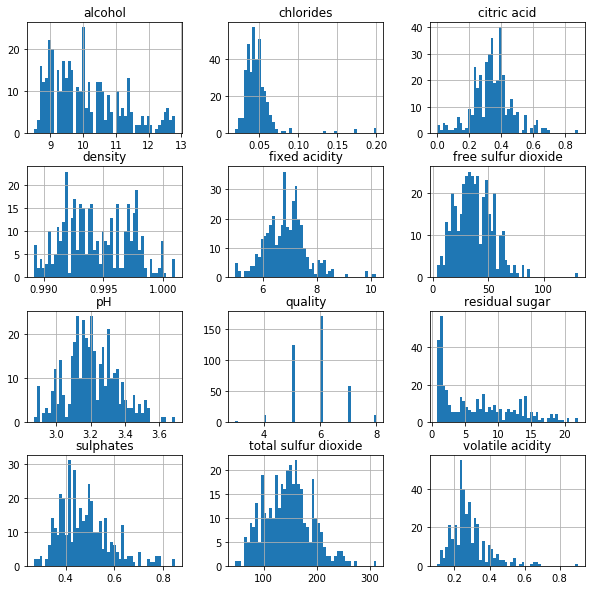

In [17]:
wine.hist(bins=50,figsize=(10,10))

Histograms where skewed too much to a side means the existance of some outliers on the opposite side.

But we need more data to choose some **variables** as the **target** for our regressor to predict these variables for us.

Let's start with some scatter plots:

First convert to fully numerical dataframe:

In [18]:
wine_numerical = wine # .drop('some_categorical_col', axis=1) 

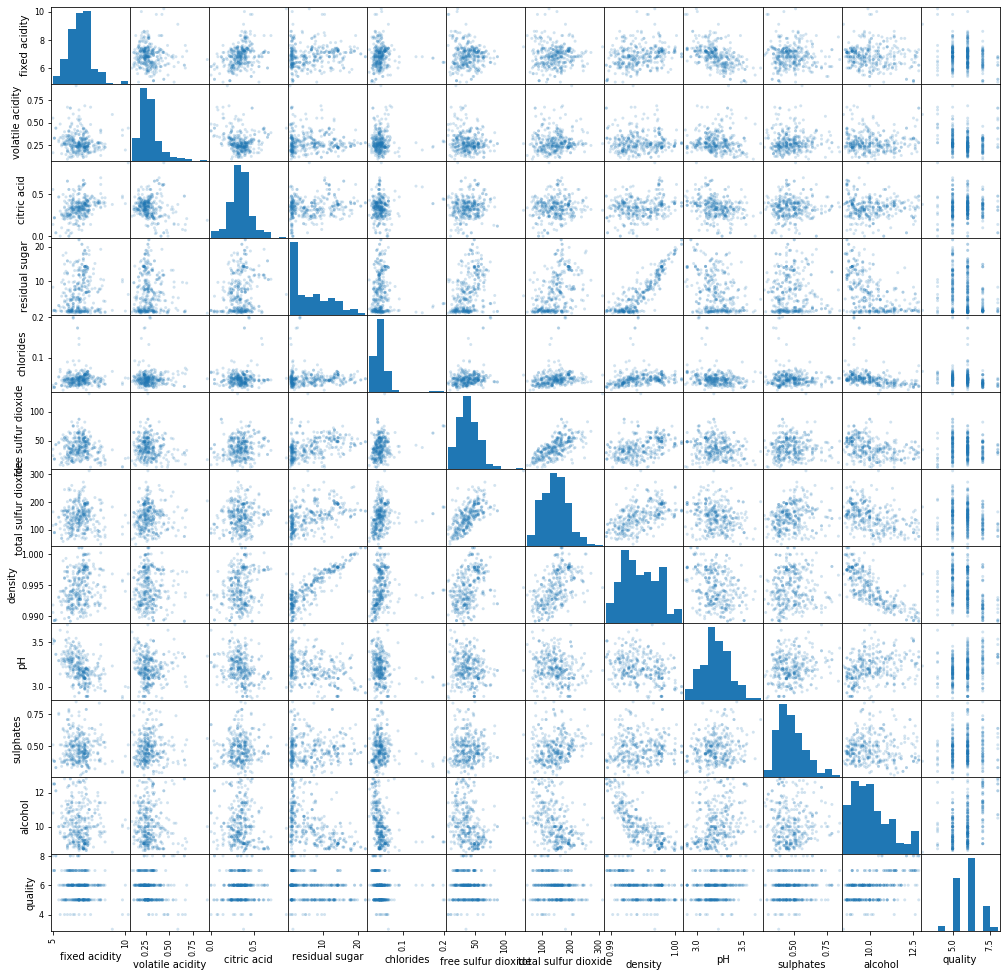

In [19]:
c = pd.plotting.scatter_matrix(wine_numerical, alpha=0.2, figsize=(17, 17))
c;

We can see that there are good realtionships between some of the variables, for example residual_sugar vs density and alcohol vs density.
However, these variables are not a very useful to us. So we choose quality and we're going to find a regressor for it with all other variables.
Also, there is something worth mentioning. As the alcohol of the wine increases, the overall logistic quality seems to increase. We can investigate t later. 

First we start splitting the data into variable-target sets:

In [20]:
# Split into variables and targets):
x = wine_numerical.copy().drop('quality', axis=1)
y = wine_numerical.copy().pop('quality')

Then, we split into validation and train sets:

In [21]:
from sklearn.model_selection import train_test_split
x_t, x_v, y_t, y_v = train_test_split(x, y, test_size=0.20, random_state=0)

We need to predict quality from all other variables:

Creating the model:

In [22]:
def build_model1():
    model = keras.Sequential([
        keras.layers.Dense(32, input_shape=[len(x_t.columns),], activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001, clipnorm=1)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error',
                         'mean_squared_error'])
    return model

model1 = build_model1()
model1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


Training:

In [23]:
history = model1.fit(x_t, y_t, validation_data=(x_v, y_v), epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 300 samples, validate on 76 samples
Epoch 1/100
300/300 [==============================] - 0s 736us/sample - loss: 26.3159 - mean_absolute_error: 3.4700 - mean_squared_error: 26.3159 - val_loss: 6.3980 - val_mean_absolute_error: 2.2666 - val_mean_squared_error: 6.3980
Epoch 2/100
300/300 [==============================] - 0s 60us/sample - loss: 5.6572 - mean_absolute_error: 1.9545 - mean_squared_error: 5.6572 - val_loss: 4.3445 - val_mean_absolute_error: 1.7793 - val_mean_squared_error: 4.3445
Epoch 3/100
300/300 [==============================] - 0s 60us/sample - loss: 4.8720 - mean_absolute_error: 1.8547 - mean_squared_error: 4.8720 - val_loss: 3.3502 - val_mean_absolute_error: 1.5642 - val_mean_squared_error: 3.3502
Epoch 4/100
300/300 [==============================] - 0s 67us/sample - loss: 4.1380 - mean_absolute_error: 1.6333 - mean_squared_error: 4.1380 - val_loss: 2.8016 - val

Evaluations:

In [24]:
val = model1.evaluate(x_v, y_v, verbose=2)

print("Testing: Loss: {:.5f}, Mean Absolute Error: {:.5f}, MSE: {:.5f} for median_house_value".format(val[0],val[1],val[2]))

76/76 - 0s - loss: 0.7197 - mean_absolute_error: 0.6693 - mean_squared_error: 0.7197
Testing: Loss: 0.71973, Mean Absolute Error: 0.66928, MSE: 0.71973 for median_house_value


Visualization:

Visualizing the Loss and Accuracy vs epochs:

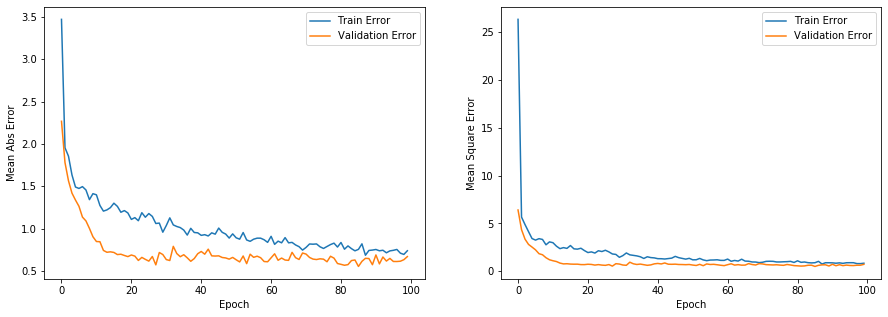

In [25]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    pyplot.figure(figsize=(15,5))

    pyplot.subplot(121)
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Mean Abs Error')
    pyplot.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    pyplot.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Validation Error')
    pyplot.legend()

    pyplot.subplot(122)
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Mean Square Error')
    pyplot.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    pyplot.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Validation Error')
    pyplot.legend()
    pyplot.show()


plot_history(history)

Very well!

Predictions:

In [26]:
test_predictions = model1.predict(x_v).flatten()

predicted_loss = np.abs(y_v.values[0:4]-test_predictions[0:4])/y_v.describe().transpose()['mean']

print("\nReal quality values:\n", y_v.values[0:4])
print("\nPredicted quality values:\n", test_predictions[0:4])
print("\nLoss:\n", predicted_loss)


Real quality values:
 [5 7 6 5]

Predicted quality values:
 [5.074024  5.506936  4.9846144 4.896918 ]

Loss:
 [0.01275701 0.25730807 0.17498709 0.01776473]


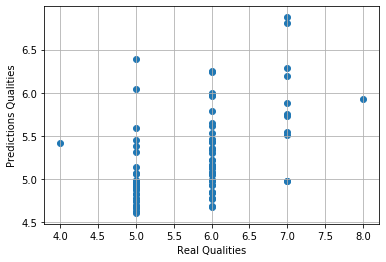

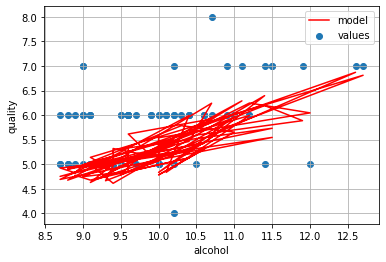

In [27]:
def plot_results(X, Y, Y_predict, plot_name):
    pyplot.figure()
    pyplot.scatter(Y, Y_predict)
    pyplot.grid()
    pyplot.xlabel("Real Qualities")
    pyplot.ylabel("Predictions Qualities")
    pyplot.figure()
    pyplot.scatter(X['alcohol'], Y, label="values")
    pyplot.plot(X['alcohol'], Y_predict, color="red", label="model")
    pyplot.grid()
    pyplot.xlabel("alcohol")
    pyplot.ylabel("quality")
    pyplot.legend()

test_predictions = model1.predict(x_v).flatten()
plot_results(x_v, y_v, test_predictions, "results_nn.png")

Hmmm, not a good linear line, but almost makes it.

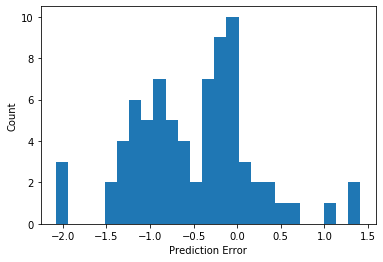

In [28]:
error = test_predictions - y_v
pyplot.hist(error, bins = 25)
pyplot.xlabel("Prediction Error")
_ = pyplot.ylabel("Count")
pyplot.show()

Let's do it agian using another model, and this time we add more layers.

In [29]:
def build_model2():
    model = keras.Sequential()
    model.add(keras.layers.Dense(32, input_shape=[len(x_t.columns),], activation="relu"))
    for i in range(10):
        model.add(keras.layers.Dropout(.2))
        model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.RMSprop(0.001, clipnorm=1)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error',
                         'mean_squared_error',
                         'mean_squared_logarithmic_error'])
    return model

model2 = build_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                384       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [30]:
history2 = model2.fit(
    x_t, y_t,
    validation_data=(x_v, y_v),
    verbose=1, epochs=100)

Train on 300 samples, validate on 76 samples
Epoch 1/100
300/300 [==============================] - 1s 2ms/sample - loss: 16.4483 - mean_absolute_error: 3.3965 - mean_squared_error: 16.4483 - mean_squared_logarithmic_error: 0.9336 - val_loss: 12.6108 - val_mean_absolute_error: 3.4002 - val_mean_squared_error: 12.6108 - val_mean_squared_logarithmic_error: 0.5471
Epoch 2/100
300/300 [==============================] - 0s 150us/sample - loss: 10.8137 - mean_absolute_error: 2.6739 - mean_squared_error: 10.8137 - mean_squared_logarithmic_error: 0.3356 - val_loss: 15.8890 - val_mean_absolute_error: 3.8804 - val_mean_squared_error: 15.8890 - val_mean_squared_logarithmic_error: 0.7645
Epoch 3/100
300/300 [==============================] - 0s 147us/sample - loss: 9.0863 - mean_absolute_error: 2.4061 - mean_squared_error: 9.0863 - mean_squared_logarithmic_error: 0.2540 - val_loss: 11.6372 - val_mean_absolute_error: 3.2563 - val_mean_squared_error: 11.6372 - val_mean_squared_logarithmic_error: 0.4

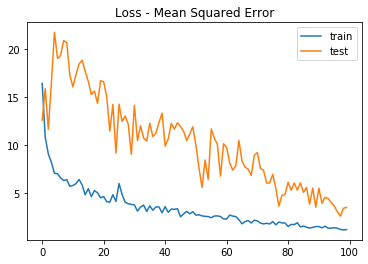

In [31]:
pyplot.title('Loss - Mean Squared Error')
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

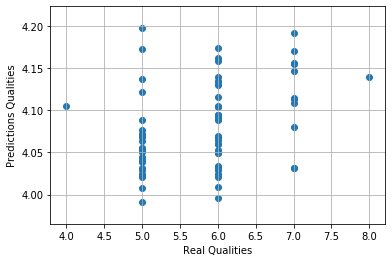

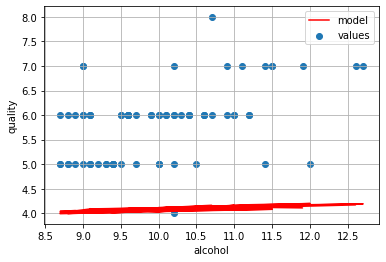

In [32]:
def plot_results(X, Y, Y_predict, plot_name):
    pyplot.figure()
    pyplot.scatter(Y, Y_predict)
    pyplot.grid()
    pyplot.xlabel("Real Qualities")
    pyplot.ylabel("Predictions Qualities")
    pyplot.figure()
    pyplot.scatter(X['alcohol'], Y, label="values")
    pyplot.plot(X['alcohol'], Y_predict, color="red", label="model")
    pyplot.grid()
    pyplot.xlabel("alcohol")
    pyplot.ylabel("quality")
    pyplot.legend()
test_predictions = model2.predict(x_v).flatten()
plot_results(x_v, y_v, test_predictions, "results_nn.png")

Compare the results:

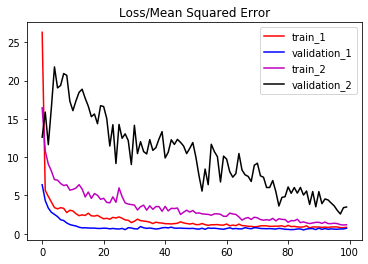

In [33]:
pyplot.title('Loss/Mean Squared Error')
pyplot.plot(history.history['loss'], 'r', label='train_1',)
pyplot.plot(history.history['val_loss'], 'b', label='validation_1')
pyplot.plot(history2.history['loss'], 'm', label='train_2')
pyplot.plot(history2.history['val_loss'], 'k', label='validation_2')
pyplot.legend()
pyplot.show()

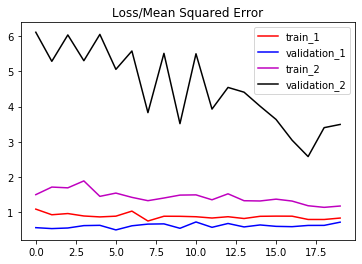

In [34]:
pyplot.title('Loss/Mean Squared Error')
pyplot.plot(history.history['loss'][80:100], 'r', label='train_1',)
pyplot.plot(history.history['val_loss'][80:100], 'b', label='validation_1')
pyplot.plot(history2.history['loss'][80:100], 'm', label='train_2')
pyplot.plot(history2.history['val_loss'][80:100], 'k', label='validation_2')
pyplot.legend()
pyplot.show()

Looks like using multi variable, we have a better model.

Prediction:

In [35]:
test_predictions = model2.predict(x_v).flatten()

predicted_loss = np.abs(y_v.values-test_predictions)/y_v.describe().transpose()['mean']

print("\nReal Qualities:\n", y_v.values[0:4])
print("\nPredicted Qualities:\n", test_predictions[0:4])
print("\nLoss:\n", predicted_loss[0:4])
print("\nMean Loss:", np.mean(predicted_loss))


Real Qualities:
 [5 7 6 5]

Predicted Qualities:
 [4.068467  4.113691  4.032355  4.0717793]

Loss:
 [0.16053628 0.49741382 0.33909531 0.15996548]

Mean Loss: 0.297140826443696


Plot the difference

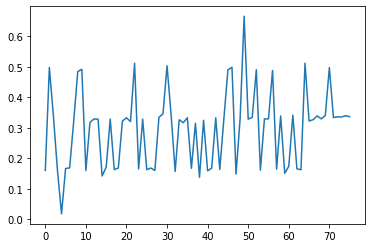

In [36]:
test_predictions = model2.predict(x_v).flatten()
pyplot.plot(range(len(predicted_loss)), predicted_loss)